# Aspect Based Sentiment Analysis with Ice Cream Database

Avisenna Abimanyu (13517010)
Muhammad Akmal (13517028)
Muhammad Nurdin Husen (13517112)

In [78]:
import pandas as pd
import nltk
import seaborn as sns
from collections import Counter
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [79]:
# pd.options.display.max_rows = None
df = pd.read_csv('reviews.csv')

In [80]:
df.head(10)

,brand,key,author,date,stars,title,helpful_yes,helpful_no,text,taste,ingredients,texture,likes
0,bj,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10.0,3.0,"Super good, don't get me wrong. But I came for...",NaN,NaN,NaN,NaN
1,bj,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3.0,0.0,I decided to try it out although I’m not a hug...,NaN,NaN,NaN,NaN
2,bj,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5.0,2.0,My caramel core begins to disappear about half...,NaN,NaN,NaN,NaN
3,bj,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24.0,1.0,Why are people complaining about the blonde br...,NaN,NaN,NaN,NaN
4,bj,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1.0,5.0,This ice cream is worst ice cream I’ve ever ta...,NaN,NaN,NaN,NaN
5,bj,0_bj,Nikiera,2020-07-23,2,Way Too Salty,3.0,1.0,I bought this last night to go with Louisiana ...,NaN,NaN,NaN,NaN
6,bj,0_bj,Mmelvin,2017-05-28,3,"Love this flavor, but...",3.0,3.0,"This is definitely my favorite flavor, but rec...",NaN,NaN,NaN,NaN
7,bj,0_bj,Shay10,2017-07-02,3,Really Wanted To Love This,4.0,1.0,"I am not a chocolate person at all, and this w...",NaN,NaN,NaN,NaN
8,bj,0_bj,caramel4dayz,2017-07-16,2,Could be better.,8.0,6.0,"I LOVE caramel, so much so that I could eat it...",NaN,NaN,NaN,NaN
9,bj,0_bj,RosaT777,2019-02-12,3,Salted Caramel core had NO CARAMEL,1.0,1.0,I love all the Ben & Jerry’s flavor. But recen...,NaN,NaN,NaN,NaN


In [81]:
df.describe()

,stars,helpful_yes,helpful_no,taste,ingredients,texture
count,21674.000000,21674.000000,21674.000000,4265.000000,4265.000000,4265.000000
mean,4.223955,1.364815,0.443019,4.234701,4.323798,4.284642
std,1.384121,8.234123,2.568762,1.401392,1.298888,1.363423
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.000000,0.000000,4.000000,4.000000,4.000000
50%,5.000000,0.000000,0.000000,5.000000,5.000000,5.000000
75%,5.000000,1.000000,0.000000,5.000000,5.000000,5.000000
max,5.000000,421.000000,121.000000,5.000000,5.000000,5.000000


ngambil kolom yang dibutuhin

In [82]:
df_training = df.drop(columns=['brand', 'key', 'author', 'date', 'helpful_yes', 'helpful_no', 'taste', 'ingredients', 'texture', 'likes'])

0. Exploratory Data Analysis

In [83]:
df_training.head()
df_training.describe()

,stars
count,21674.000000
mean,4.223955
std,1.384121
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [84]:
df_training.shape

(21674, 3)

In [85]:
df_training.drop_duplicates(inplace=True)
df_training.shape

(21616, 3)

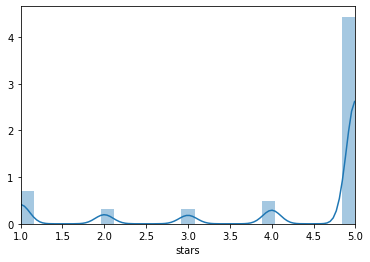

In [86]:
sns.distplot(df_training["stars"], bins=25)
plt.xlim([1,5])
plt.show()

In [87]:
df_training['stars'] = (df['stars'] >= 3).astype(int)
df_training.head()

,stars,title,text
0,1,Not enough brownies!,"Super good, don't get me wrong. But I came for..."
1,1,I’m OBSESSED with this pint!,I decided to try it out although I’m not a hug...
2,1,My favorite...More Caramel Please,My caramel core begins to disappear about half...
3,1,Obsessed!!!,Why are people complaining about the blonde br...
4,0,Worst Ice Cream Ever!,This ice cream is worst ice cream I’ve ever ta...


In [88]:
df_training.rename(columns={'stars': 'sentiment'}).head()

,sentiment,title,text
0,1,Not enough brownies!,"Super good, don't get me wrong. But I came for..."
1,1,I’m OBSESSED with this pint!,I decided to try it out although I’m not a hug...
2,1,My favorite...More Caramel Please,My caramel core begins to disappear about half...
3,1,Obsessed!!!,Why are people complaining about the blonde br...
4,0,Worst Ice Cream Ever!,This ice cream is worst ice cream I’ve ever ta...


In [89]:
df_training.describe()
df_training.shape

(21616, 3)

1. Preprocessing

In [ ]:
def process_text(text_input):
    clean_text = text_input
    nopunc=[char for char in clean_text if char not in string.punctuation] # menghilangkan punctuation
    nopunc=''.join(nopunc)
    clean_text = [word for word in nopunc.split() if word not in stopwords.words('english')] # menghilangkan stopwords
    wordnet_lemmatizer = WordNetLemmatizer()
    clean_text = [wordnet_lemmatizer.lemmatize(word) for word in clean_text] # lemmatization
    return ' '.join(clean_text)